In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from collections import Counter
from torchvision.models import ResNet50_Weights


/home/vsuciu/miniconda3/envs/oln/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
csv_dir = '/home/vsuciu/data/hdvila/videos/bboxes'

## Read data

In [3]:
csv_fps = [os.path.join(csv_dir, d) for d in os.listdir(csv_dir) if d[-4:] == '.csv']

In [4]:
video_df = pd.read_csv(csv_fps[0])
video_df

,frame_idx,x1,y1,x2,y2,coco_label,coco_label_score,imagenet_label,imagenet_label_score
0,0,804.0,842.0,359.0,379.0,2,0.107245,harmonica,-1
1,0,939.0,1043.0,551.0,641.0,39,0.685919,ski,-1
2,60,0.0,52.0,392.0,448.0,0,0.184032,hourglass,-1
3,60,833.0,879.0,372.0,395.0,2,0.156714,waffle iron,-1
4,60,919.0,955.0,412.0,435.0,2,0.143068,milk can,-1
...,...,...,...,...,...,...,...,...,...
468,5815,811.0,950.0,533.0,574.0,33,0.420695,ocarina,-1
469,5815,864.0,936.0,534.0,572.0,33,0.145699,flatworm,-1
470,5875,636.0,1080.0,215.0,568.0,0,0.998236,barrow,-1
471,5875,1065.0,1088.0,279.0,306.0,0,0.375004,rock beauty,-1


## Count total imagenet class occurances

In [5]:
model_meta = ResNet50_Weights.IMAGENET1K_V2
# all_imgnet_classes = model_meta.meta['categories']
all_imgnet_classes = [i for i in range(80)]
class_counter = Counter({label: 0 for label in all_imgnet_classes})

for fp in csv_fps:
    video_df = pd.read_csv(fp)
    for label in video_df['coco_label']:
        class_counter[label] += 1

## Count unique imagnet class occurances
only count one of each class per video

In [6]:
model_meta = ResNet50_Weights.IMAGENET1K_V2
# all_imgnet_classes = model_meta.meta['categories']
unique_class_counter = Counter({label: 0 for label in all_imgnet_classes})

for fp in csv_fps:
    video_df = pd.read_csv(fp)
    for label in video_df['coco_label'].unique():
        unique_class_counter[label] += 1

## Count number of seen imagenet classes

In [7]:
nonzero_count = 0

for category in unique_class_counter.keys():
    if unique_class_counter[category] > 0:
        nonzero_count += 1
print(f'Found {nonzero_count}/{len(all_imgnet_classes)} classes')

Found 81/80 classes


In [8]:
print(class_counter['-1'])
print(len(model_meta.meta['categories']))
print('killer whale' in np.array(all_imgnet_classes))

0
1000
False


/tmp/ipykernel_162668/3905061337.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print('killer whale' in np.array(all_imgnet_classes))


## Visualize counts

In [16]:
coco_class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic_light', 'fire_hydrant', 'stop_sign', 'parking_meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports_ball', 'kite', 'baseball_bat', 'baseball_glove', 'skateboard', 'surfboard', 'tennis_racket', 'bottle', 'wine_glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot_dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted_plant', 'bed', 'dining_table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell_phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy_bear', 'hair_drier', 'toothbrush']
matplotlib.rcParams['figure.figsize'] = [20, 5] # https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger

def plot_counter(counter):
    key_list = [k for k in counter.keys()]
    count_list = [[k, counter[k]] for k in key_list if k != '-1' and k != -1]
    count_list.sort(key=lambda x: x[1])
    print(count_list[:20])
    print()
    print(count_list[-20:])
    plt.xticks(rotation='vertical') # https://stackoverflow.com/questions/1221108/barchart-with-vertical-labels-in-python-matplotlib
    plt.bar([coco_class_names[element[0]] for element in count_list], [element[1] for element in count_list])

def log_stats(counter, fp, header=''):
    with open(fp, 'w') as stats_file:
        key_list = [k for k in counter.keys()]
        count_list = [[k, counter[k]] for k in key_list if k != '-1' and k != -1]
        count_list.sort(key=lambda x: x[1])
        names = [coco_class_names[element[0]] for element in count_list]
        counts = [element[1] for element in count_list]
        stats_file.write(header + '\n')
        for n, c in zip(names, counts):
            stats_file.write(f'{n},{c}' + '\n')

[[78, 19], [70, 46], [23, 50], [22, 91], [30, 225], [35, 229], [21, 257], [52, 259], [53, 279], [34, 290], [38, 334], [31, 345], [15, 355], [10, 358], [48, 379], [20, 386], [12, 424], [36, 500], [18, 516], [5, 538]]

[[75, 2684], [9, 2846], [74, 2971], [25, 3193], [14, 3808], [63, 4247], [2, 4535], [33, 4754], [45, 5228], [58, 5256], [26, 5332], [62, 5463], [67, 5742], [27, 6072], [39, 6641], [41, 6868], [60, 8448], [73, 14713], [56, 19200], [0, 65152]]


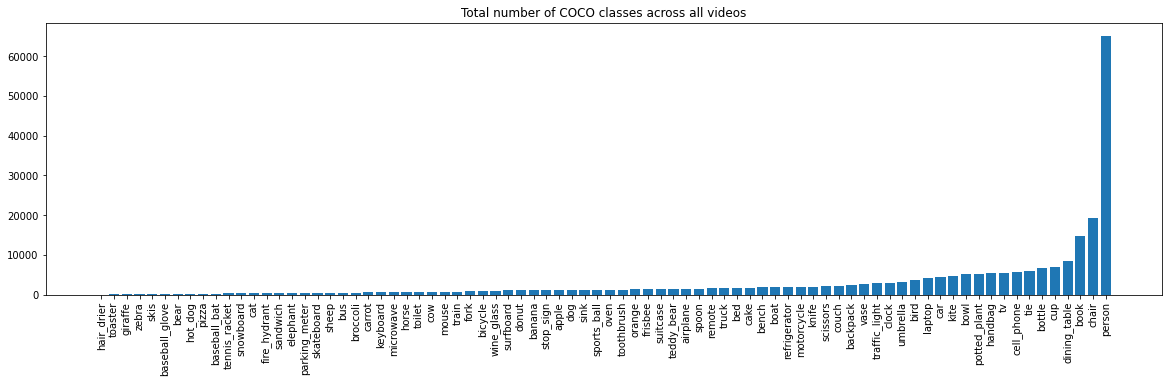

In [14]:
plt.title('Total number of COCO classes across all videos')
plot_counter(class_counter)

[[78, 13], [70, 15], [23, 21], [22, 25], [21, 34], [18, 44], [48, 46], [30, 49], [53, 49], [19, 51], [20, 51], [52, 52], [50, 55], [51, 58], [49, 63], [10, 68], [35, 68], [66, 70], [17, 72], [12, 78]]

[[24, 146], [2, 148], [63, 148], [65, 149], [75, 149], [58, 152], [74, 153], [9, 155], [27, 160], [25, 161], [26, 162], [62, 162], [39, 163], [14, 165], [60, 166], [73, 174], [41, 175], [67, 177], [56, 187], [0, 196]]


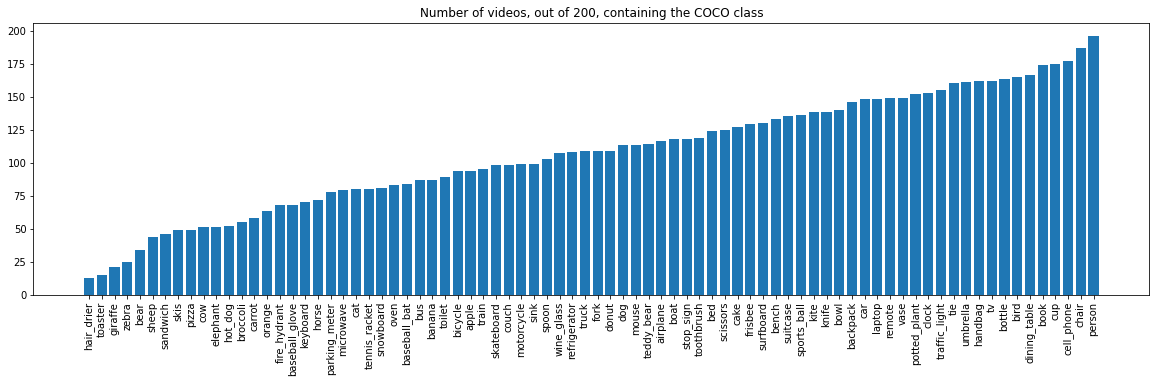

In [15]:
plt.title('Number of videos, out of 200, containing the COCO class')
plot_counter(unique_class_counter)

In [18]:
log_stats(unique_class_counter, 'coco_num_videos_per_class.csv', header='coco class name,number of videos out of approx. 200')
log_stats(class_counter, 'coco_total_instances_each_class.csv', header='coco class name,total occurances in approx. 200 videos with 100 frames each')